In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga desde un archivo .xlsx sin indice
df_M= pd.read_csv('cdmx_sin_nulos.csv')
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   id                                            26582 non-null  int64  
 2   scrape_id                                     26582 non-null  int64  
 3   last_scraped                                  26582 non-null  object 
 4   name                                          26582 non-null  object 
 5   host_id                                       26582 non-null  int64  
 6   host_name                                     26582 non-null  object 
 7   host_since                                    26582 non-null  object 
 8   host_response_time                            26582 non-null  object 
 9   host_response_rate                            26582 non-null 

In [18]:
# Filtrar solo columnas de tipo int o float y eliminar las demás
dataM = df_M.drop(columns=df_M.select_dtypes(exclude=['int', 'float']).columns)

#Creo 2 dataframes para poder procesar los outliers
cuantitativasM= dataM.iloc[ : , 1:23]
cualitativasM= dataM.iloc[ : , [0] ]

dataM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   id                                            26582 non-null  int64  
 2   scrape_id                                     26582 non-null  int64  
 3   host_id                                       26582 non-null  int64  
 4   host_response_rate                            26582 non-null  float64
 5   host_acceptance_rate                          26582 non-null  float64
 6   host_listings_count                           26582 non-null  int64  
 7   host_total_listings_count                     26582 non-null  int64  
 8   latitude                                      26582 non-null  float64
 9   longitude                                     26582 non-null 

<Figure size 1500x800 with 0 Axes>

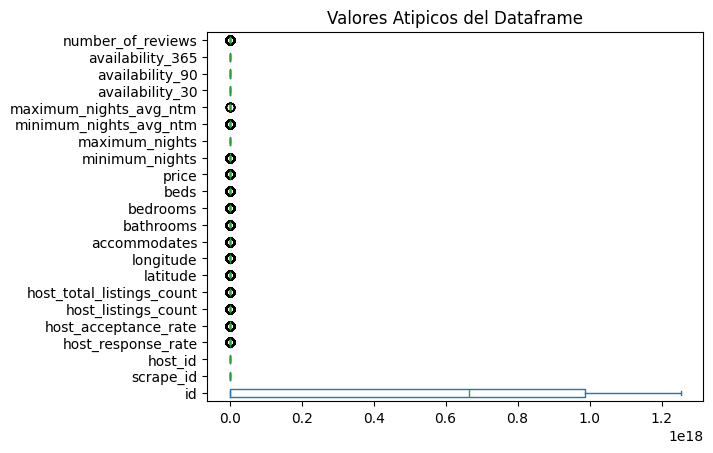

In [20]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativasM.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibuja el diagrama

In [22]:
#Realizamos una copia del dataframe
data1M=df_M.copy()

#Método aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativasM
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                           1.997574e+18
scrape_id                    2.024093e+13
host_id                      7.675833e+08
host_response_rate           1.509892e+00
host_acceptance_rate         1.578158e+00
host_listings_count          3.295566e+02
host_total_listings_count    6.148874e+02
latitude                     1.953289e+01
longitude                   -9.906674e+01
accommodates                 1.043010e+01
bathrooms                    4.605316e+00
bedrooms                     5.345804e+00
beds                         6.981545e+00
price                        1.578231e+04
minimum_nights               8.183006e+01
maximum_nights               1.793887e+03
minimum_nights_avg_ntm       7.949662e+01
maximum_nights_avg_ntm       2.102283e+03
availability_30              4.852387e+01
availability_90              1.496068e+02
availability_365             6.026093e+02
number_of_reviews            2.711536e+02
dtype: float64
Limite inferior permitido id       

In [24]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
data1M= cuantitativasM[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data1M

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,35797,20240925021012,153786,NaN,0.99,1.0,1.0,19.383820,NaN,2.0,...,1.000000,3865.0,1.0,7.0,1.0,7.0,28,88,363,0.0
1,44616,20240925021012,196253,1.00,0.93,12.0,13.0,19.411620,-99.177940,NaN,...,1.967836,999.0,1.0,365.0,1.0,365.0,1,54,325,64.0
2,67703,20240925021012,334451,0.71,0.57,3.0,4.0,19.411520,-99.168570,4.0,...,2.000000,2029.0,2.0,30.0,2.0,30.0,3,50,325,49.0
3,70644,20240925021012,212109,1.00,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,1.000000,1140.0,5.0,180.0,3.7,180.0,7,57,257,127.0
4,107078,20240925021012,540705,1.00,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,1.000000,3633.0,1.0,365.0,1.0,1125.0,9,20,275,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.00,1.00,167.0,279.0,19.387329,-99.246731,4.0,...,2.000000,488.0,1.0,45.0,2.9,45.0,30,90,365,0.0
26578,1252159821531694005,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2800.0,1.0,365.0,1.0,365.0,0,0,177,0.0
26579,1252185591721328995,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2700.0,1.0,365.0,1.0,365.0,0,0,177,0.0
26580,1252218347521498445,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2600.0,1.0,365.0,1.0,365.0,0,0,177,0.0


In [26]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data1M.copy()
data_clean=data_clean.fillna(round(data1M.mean(),1))
data_clean

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,35797,20240925021012,153786,1.00,0.99,1.0,1.0,19.383820,-99.200000,2.0,...,1.000000,3865.0,1.0,7.0,1.0,7.0,28,88,363,0.0
1,44616,20240925021012,196253,1.00,0.93,12.0,13.0,19.411620,-99.177940,3.1,...,1.967836,999.0,1.0,365.0,1.0,365.0,1,54,325,64.0
2,67703,20240925021012,334451,0.71,0.57,3.0,4.0,19.411520,-99.168570,4.0,...,2.000000,2029.0,2.0,30.0,2.0,30.0,3,50,325,49.0
3,70644,20240925021012,212109,1.00,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,1.000000,1140.0,5.0,180.0,3.7,180.0,7,57,257,127.0
4,107078,20240925021012,540705,1.00,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,1.000000,3633.0,1.0,365.0,1.0,1125.0,9,20,275,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.00,1.00,167.0,279.0,19.387329,-99.246731,4.0,...,2.000000,488.0,1.0,45.0,2.9,45.0,30,90,365,0.0
26578,1252159821531694005,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2800.0,1.0,365.0,1.0,365.0,0,0,177,0.0
26579,1252185591721328995,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2700.0,1.0,365.0,1.0,365.0,0,0,177,0.0
26580,1252218347521498445,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2600.0,1.0,365.0,1.0,365.0,0,0,177,0.0


In [28]:
#Realizamos una copia del dataframe
data2M=data_clean.copy()

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativasM

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                           2.467577e+18
scrape_id                    2.024093e+13
host_id                      8.612864e+08
host_response_rate           1.000000e+00
host_acceptance_rate         1.060000e+00
host_listings_count          3.350000e+01
host_total_listings_count    3.950000e+01
latitude                     1.949409e+01
longitude                   -9.911773e+01
accommodates                 7.000000e+00
bathrooms                    3.500000e+00
bedrooms                     3.500000e+00
beds                         3.500000e+00
price                        2.713500e+03
minimum_nights               3.500000e+00
maximum_nights               2.542500e+03
minimum_nights_avg_ntm       5.250000e+00
maximum_nights_avg_ntm       2.265000e+03
availability_30              6.350000e+01
availability_90              1.625000e+02
availability_365             7.105000e+02
number_of_reviews            1.355000e+02
dtype: float64
Limite inferior permitido id       

In [30]:
#obtenemos datos limpios del dataframe
data2M= cuantitativasM[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2M

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,35797,20240925021012,153786,NaN,0.99,1.0,1.0,19.383820,NaN,2.0,...,1.000000,NaN,1.0,7,1.0,7.0,28,88,363,0.0
1,44616,20240925021012,196253,1.0,0.93,12.0,13.0,19.411620,-99.177940,NaN,...,1.967836,999.0,1.0,365,1.0,365.0,1,54,325,64.0
2,67703,20240925021012,334451,NaN,NaN,3.0,4.0,19.411520,-99.168570,4.0,...,2.000000,2029.0,2.0,30,2.0,30.0,3,50,325,49.0
3,70644,20240925021012,212109,1.0,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,1.000000,1140.0,NaN,180,3.7,180.0,7,57,257,127.0
4,107078,20240925021012,540705,1.0,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,1.000000,NaN,1.0,365,1.0,1125.0,9,20,275,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.0,1.00,NaN,NaN,19.387329,NaN,4.0,...,2.000000,488.0,1.0,45,2.9,45.0,30,90,365,0.0
26578,1252159821531694005,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,NaN,1.0,365,1.0,365.0,0,0,177,0.0
26579,1252185591721328995,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2700.0,1.0,365,1.0,365.0,0,0,177,0.0
26580,1252218347521498445,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2600.0,1.0,365,1.0,365.0,0,0,177,0.0


In [33]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data3M=data2M.copy()
data3M=data3M.fillna(round(data2M.mean(),1))
data3M

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,35797,20240925021012,153786,1.0,0.99,1.0,1.0,19.383820,-99.200000,2.0,...,1.000000,1026.3,1.0,7,1.0,7.0,28,88,363,0.0
1,44616,20240925021012,196253,1.0,0.93,12.0,13.0,19.411620,-99.177940,2.9,...,1.967836,999.0,1.0,365,1.0,365.0,1,54,325,64.0
2,67703,20240925021012,334451,1.0,1.00,3.0,4.0,19.411520,-99.168570,4.0,...,2.000000,2029.0,2.0,30,2.0,30.0,3,50,325,49.0
3,70644,20240925021012,212109,1.0,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,1.000000,1140.0,1.6,180,3.7,180.0,7,57,257,127.0
4,107078,20240925021012,540705,1.0,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,1.000000,1026.3,1.0,365,1.0,1125.0,9,20,275,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.0,1.00,6.2,7.3,19.387329,-99.200000,4.0,...,2.000000,488.0,1.0,45,2.9,45.0,30,90,365,0.0
26578,1252159821531694005,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,1026.3,1.0,365,1.0,365.0,0,0,177,0.0
26579,1252185591721328995,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2700.0,1.0,365,1.0,365.0,0,0,177,0.0
26580,1252218347521498445,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,1.000000,2600.0,1.0,365,1.0,365.0,0,0,177,0.0


In [35]:
Datos_limpios = pd.concat([cualitativasM, data3M], axis=1)
Datos_limpios

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,0,35797,20240925021012,153786,1.0,0.99,1.0,1.0,19.383820,-99.200000,...,1.000000,1026.3,1.0,7,1.0,7.0,28,88,363,0.0
1,1,44616,20240925021012,196253,1.0,0.93,12.0,13.0,19.411620,-99.177940,...,1.967836,999.0,1.0,365,1.0,365.0,1,54,325,64.0
2,2,67703,20240925021012,334451,1.0,1.00,3.0,4.0,19.411520,-99.168570,...,2.000000,2029.0,2.0,30,2.0,30.0,3,50,325,49.0
3,3,70644,20240925021012,212109,1.0,1.00,3.0,4.0,19.356140,-99.163080,...,1.000000,1140.0,1.6,180,3.7,180.0,7,57,257,127.0
4,4,107078,20240925021012,540705,1.0,1.00,5.0,7.0,19.432110,-99.193270,...,1.000000,1026.3,1.0,365,1.0,1125.0,9,20,275,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,20240925021012,67472234,1.0,1.00,6.2,7.3,19.387329,-99.200000,...,2.000000,488.0,1.0,45,2.9,45.0,30,90,365,0.0
26578,26578,1252159821531694005,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,...,1.000000,1026.3,1.0,365,1.0,365.0,0,0,177,0.0
26579,26579,1252185591721328995,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,...,1.000000,2700.0,1.0,365,1.0,365.0,0,0,177,0.0
26580,26580,1252218347521498445,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,...,1.000000,2600.0,1.0,365,1.0,365.0,0,0,177,0.0


In [37]:
Datos_limpios.to_csv("Datos_limpios_México.csv")
#Identificar valores nulos 
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                   0
id                           0
scrape_id                    0
host_id                      0
host_response_rate           0
host_acceptance_rate         0
host_listings_count          0
host_total_listings_count    0
latitude                     0
longitude                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
maximum_nights               0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_90              0
availability_365             0
number_of_reviews            0
dtype: int64

In [45]:
#Carga desde un archivo .xlsx sin indice
df_c= pd.read_csv('China_sin_nulos.csv')
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6837 non-null   int64  
 1   id                                            6837 non-null   int64  
 2   scrape_id                                     6837 non-null   int64  
 3   last_scraped                                  6837 non-null   object 
 4   name                                          6837 non-null   object 
 5   host_id                                       6837 non-null   int64  
 6   host_name                                     6837 non-null   object 
 7   host_since                                    6837 non-null   object 
 8   host_response_time                            6837 non-null   object 
 9   host_response_rate                            6837 non-null   i

In [50]:
# Filtrar solo columnas de tipo int o float y eliminar las demás
datac = df_c.drop(columns=df_c.select_dtypes(exclude=['int', 'float']).columns)
datac = datac.drop(['license'], axis=1)

#Creo 2 dataframes para poder procesar los outliers
cuantitativasc= datac.iloc[ : , 1:23]
cualitativasc= datac.iloc[ : , [0] ]

datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6837 non-null   int64  
 1   id                                            6837 non-null   int64  
 2   scrape_id                                     6837 non-null   int64  
 3   host_id                                       6837 non-null   int64  
 4   host_response_rate                            6837 non-null   int64  
 5   host_acceptance_rate                          6837 non-null   float64
 6   host_listings_count                           6837 non-null   int64  
 7   host_total_listings_count                     6837 non-null   int64  
 8   latitude                                      6837 non-null   float64
 9   longitude                                     6837 non-null   f

<Figure size 1500x800 with 0 Axes>

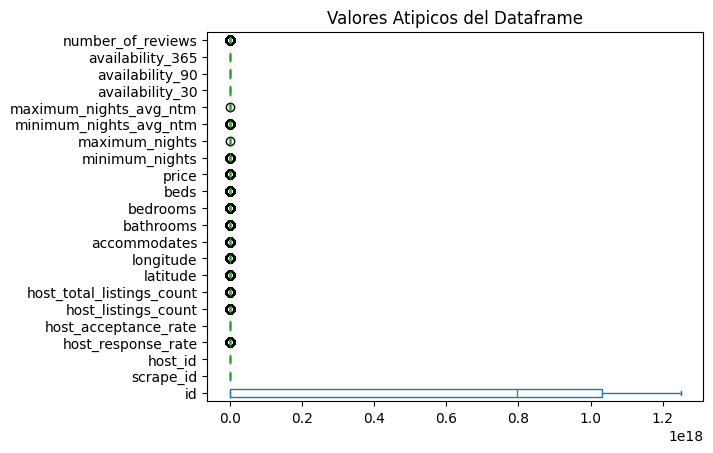

In [52]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativasc.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibuja el diagrama

In [54]:
#Realizamos una copia del dataframe
data1c=df_c.copy()

#Método aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativasc
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                           2.067750e+18
scrape_id                    2.024092e+13
host_id                      7.921926e+08
host_response_rate           1.485896e+02
host_acceptance_rate         1.534840e+02
host_listings_count          7.089943e+02
host_total_listings_count    8.472483e+02
latitude                     2.239601e+01
longitude                    1.143148e+02
accommodates                 8.398407e+00
bathrooms                    2.687539e+00
bedrooms                     3.815977e+00
beds                         5.788344e+00
price                        9.430829e+03
minimum_nights               1.052121e+02
maximum_nights               1.940658e+03
minimum_nights_avg_ntm       1.047989e+02
maximum_nights_avg_ntm       1.992425e+03
availability_30              5.558329e+01
availability_90              1.658636e+02
availability_365             6.389910e+02
number_of_reviews            1.374974e+02
dtype: float64
Limite inferior permitido id       

In [56]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
data1c= cuantitativasc[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data1c

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,103760,20240920211541,304876,100.0,92.0,6.0,59.0,22.284180,114.154310,6.0,...,3.0,1122.0,28.0,1125.0,28.0,1125.0,30,90,365,NaN
1,248140,20240920211541,1300549,100.0,71.0,1.0,1.0,22.282280,114.149230,2.0,...,1.0,629.0,3.0,60.0,2.7,60.0,8,48,48,NaN
2,263081,20240920211541,1370155,50.0,70.0,1.0,1.0,22.277230,114.150830,8.0,...,1.6,406.0,10.0,30.0,10.0,30.0,28,88,363,0.0
3,274589,20240920211541,1435069,100.0,85.0,1.0,1.0,22.279240,114.169950,4.0,...,3.0,1108.0,4.0,1125.0,4.0,1125.0,4,35,280,NaN
4,280746,20240920211541,1443229,90.0,88.0,2.0,19.0,NaN,NaN,6.0,...,3.0,958.0,3.0,365.0,3.0,365.0,8,54,329,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,1248951380991453329,20240920211541,9157229,100.0,92.0,7.0,7.0,22.318196,114.171552,NaN,...,4.0,1433.0,2.0,365.0,2.0,365.0,21,60,331,0.0
6833,1248993038328553514,20240920211541,473431773,50.0,70.0,2.0,2.0,22.284776,114.142379,2.0,...,1.0,622.0,2.0,365.0,2.0,365.0,26,81,356,0.0
6834,1249063704541937772,20240920211541,122131447,96.0,100.0,93.0,93.0,22.297948,114.171849,1.0,...,1.0,313.0,1.0,365.0,1.0,365.0,27,87,362,0.0
6835,1249228606002420884,20240920211541,3776595,100.0,99.0,37.0,39.0,22.276888,114.173572,6.0,...,4.0,853.0,1.0,365.0,16.2,365.0,22,49,228,0.0


In [58]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data1c.copy()
data_clean=data_clean.fillna(round(data1c.mean(),1))
data_clean

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,103760,20240920211541,304876,100.0,92.0,6.0,59.0,22.284180,114.154310,6.0,...,3.0,1122.0,28.0,1125.0,28.0,1125.0,30,90,365,8.7
1,248140,20240920211541,1300549,100.0,71.0,1.0,1.0,22.282280,114.149230,2.0,...,1.0,629.0,3.0,60.0,2.7,60.0,8,48,48,8.7
2,263081,20240920211541,1370155,50.0,70.0,1.0,1.0,22.277230,114.150830,8.0,...,1.6,406.0,10.0,30.0,10.0,30.0,28,88,363,0.0
3,274589,20240920211541,1435069,100.0,85.0,1.0,1.0,22.279240,114.169950,4.0,...,3.0,1108.0,4.0,1125.0,4.0,1125.0,4,35,280,8.7
4,280746,20240920211541,1443229,90.0,88.0,2.0,19.0,22.300000,114.200000,6.0,...,3.0,958.0,3.0,365.0,3.0,365.0,8,54,329,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,1248951380991453329,20240920211541,9157229,100.0,92.0,7.0,7.0,22.318196,114.171552,2.4,...,4.0,1433.0,2.0,365.0,2.0,365.0,21,60,331,0.0
6833,1248993038328553514,20240920211541,473431773,50.0,70.0,2.0,2.0,22.284776,114.142379,2.0,...,1.0,622.0,2.0,365.0,2.0,365.0,26,81,356,0.0
6834,1249063704541937772,20240920211541,122131447,96.0,100.0,93.0,93.0,22.297948,114.171849,1.0,...,1.0,313.0,1.0,365.0,1.0,365.0,27,87,362,0.0
6835,1249228606002420884,20240920211541,3776595,100.0,99.0,37.0,39.0,22.276888,114.173572,6.0,...,4.0,853.0,1.0,365.0,16.2,365.0,22,49,228,0.0


In [60]:
#Realizamos una copia del dataframe
data2c=data_clean.copy()

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativasc

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                           2.578899e+18
scrape_id                    2.024092e+13
host_id                      9.280376e+08
host_response_rate           1.105000e+02
host_acceptance_rate         1.775000e+02
host_listings_count          7.200000e+02
host_total_listings_count    7.920000e+02
latitude                     2.235763e+01
longitude                    1.142209e+02
accommodates                 6.000000e+00
bathrooms                    1.250000e+00
bedrooms                     1.000000e+00
beds                         3.500000e+00
price                        1.527500e+03
minimum_nights               7.100000e+01
maximum_nights               2.265000e+03
minimum_nights_avg_ntm       7.100000e+01
maximum_nights_avg_ntm       2.265000e+03
availability_30              6.350000e+01
availability_90              1.745000e+02
availability_365             7.630000e+02
number_of_reviews            1.750000e+01
dtype: float64
Limite inferior permitido id       

In [62]:
#obtenemos datos limpios del dataframe
data2c= cuantitativasc[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2c

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,103760,20240920211541,304876,100.0,92.0,6.0,59.0,22.284180,114.154310,6.0,...,3.0,1122.0,28.0,1125.0,28.0,1125.0,30,90,365,NaN
1,248140,20240920211541,1300549,100.0,71.0,1.0,1.0,22.282280,114.149230,2.0,...,1.0,629.0,3.0,60.0,2.7,60.0,8,48,48,NaN
2,263081,20240920211541,1370155,NaN,70.0,1.0,1.0,22.277230,114.150830,NaN,...,1.6,406.0,10.0,30.0,10.0,30.0,28,88,363,0.0
3,274589,20240920211541,1435069,100.0,85.0,1.0,1.0,22.279240,114.169950,4.0,...,3.0,1108.0,4.0,1125.0,4.0,1125.0,4,35,280,NaN
4,280746,20240920211541,1443229,90.0,88.0,2.0,19.0,NaN,NaN,6.0,...,3.0,958.0,3.0,365.0,3.0,365.0,8,54,329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,1248951380991453329,20240920211541,9157229,100.0,92.0,7.0,7.0,22.318196,114.171552,NaN,...,NaN,1433.0,2.0,365.0,2.0,365.0,21,60,331,0.0
6833,1248993038328553514,20240920211541,473431773,NaN,70.0,2.0,2.0,22.284776,114.142379,2.0,...,1.0,622.0,2.0,365.0,2.0,365.0,26,81,356,0.0
6834,1249063704541937772,20240920211541,122131447,96.0,100.0,93.0,93.0,22.297948,114.171849,1.0,...,1.0,313.0,1.0,365.0,1.0,365.0,27,87,362,0.0
6835,1249228606002420884,20240920211541,3776595,100.0,99.0,37.0,39.0,22.276888,114.173572,6.0,...,NaN,853.0,1.0,365.0,16.2,365.0,22,49,228,0.0


In [64]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data3c=data2c.copy()
data3c=data3c.fillna(round(data2c.mean(),1))
data3c

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,103760,20240920211541,304876,100.0,92.0,6.0,59.0,22.284180,114.154310,6.0,...,3.0,1122.0,28.0,1125.0,28.0,1125.0,30,90,365,1.9
1,248140,20240920211541,1300549,100.0,71.0,1.0,1.0,22.282280,114.149230,2.0,...,1.0,629.0,3.0,60.0,2.7,60.0,8,48,48,1.9
2,263081,20240920211541,1370155,97.8,70.0,1.0,1.0,22.277230,114.150830,2.2,...,1.6,406.0,10.0,30.0,10.0,30.0,28,88,363,0.0
3,274589,20240920211541,1435069,100.0,85.0,1.0,1.0,22.279240,114.169950,4.0,...,3.0,1108.0,4.0,1125.0,4.0,1125.0,4,35,280,1.9
4,280746,20240920211541,1443229,90.0,88.0,2.0,19.0,22.300000,114.200000,6.0,...,3.0,958.0,3.0,365.0,3.0,365.0,8,54,329,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,1248951380991453329,20240920211541,9157229,100.0,92.0,7.0,7.0,22.318196,114.171552,2.2,...,1.3,1433.0,2.0,365.0,2.0,365.0,21,60,331,0.0
6833,1248993038328553514,20240920211541,473431773,97.8,70.0,2.0,2.0,22.284776,114.142379,2.0,...,1.0,622.0,2.0,365.0,2.0,365.0,26,81,356,0.0
6834,1249063704541937772,20240920211541,122131447,96.0,100.0,93.0,93.0,22.297948,114.171849,1.0,...,1.0,313.0,1.0,365.0,1.0,365.0,27,87,362,0.0
6835,1249228606002420884,20240920211541,3776595,100.0,99.0,37.0,39.0,22.276888,114.173572,6.0,...,1.3,853.0,1.0,365.0,16.2,365.0,22,49,228,0.0


In [67]:
Datos_limpios = pd.concat([cualitativasc, data3c], axis=1)
Datos_limpios

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,0,103760,20240920211541,304876,100.0,92.0,6.0,59.0,22.284180,114.154310,...,3.0,1122.0,28.0,1125.0,28.0,1125.0,30,90,365,1.9
1,1,248140,20240920211541,1300549,100.0,71.0,1.0,1.0,22.282280,114.149230,...,1.0,629.0,3.0,60.0,2.7,60.0,8,48,48,1.9
2,2,263081,20240920211541,1370155,97.8,70.0,1.0,1.0,22.277230,114.150830,...,1.6,406.0,10.0,30.0,10.0,30.0,28,88,363,0.0
3,3,274589,20240920211541,1435069,100.0,85.0,1.0,1.0,22.279240,114.169950,...,3.0,1108.0,4.0,1125.0,4.0,1125.0,4,35,280,1.9
4,4,280746,20240920211541,1443229,90.0,88.0,2.0,19.0,22.300000,114.200000,...,3.0,958.0,3.0,365.0,3.0,365.0,8,54,329,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,6832,1248951380991453329,20240920211541,9157229,100.0,92.0,7.0,7.0,22.318196,114.171552,...,1.3,1433.0,2.0,365.0,2.0,365.0,21,60,331,0.0
6833,6833,1248993038328553514,20240920211541,473431773,97.8,70.0,2.0,2.0,22.284776,114.142379,...,1.0,622.0,2.0,365.0,2.0,365.0,26,81,356,0.0
6834,6834,1249063704541937772,20240920211541,122131447,96.0,100.0,93.0,93.0,22.297948,114.171849,...,1.0,313.0,1.0,365.0,1.0,365.0,27,87,362,0.0
6835,6835,1249228606002420884,20240920211541,3776595,100.0,99.0,37.0,39.0,22.276888,114.173572,...,1.3,853.0,1.0,365.0,16.2,365.0,22,49,228,0.0


In [68]:
Datos_limpios.to_csv("Datos_limpios_China.csv")
#Identificar valores nulos 
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                   0
id                           0
scrape_id                    0
host_id                      0
host_response_rate           0
host_acceptance_rate         0
host_listings_count          0
host_total_listings_count    0
latitude                     0
longitude                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
maximum_nights               0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_90              0
availability_365             0
number_of_reviews            0
dtype: int64